# Problem Statement:-
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. Independent Variables:

Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

Married - This refers to applicant being in a state of matrimony

Dependents - This refres to persons who depends on the applicants for survival

Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

Applicant Income - This refers to disposable income available for the applicant's use under State law.

CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

Loan_Amount - This refers to the amount of money an applicant owe at any given time.

Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. Dataset Link- https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.shape

(614, 13)

There are total of 614 rows and 13 columns present in the dataset.

There are null values present in the dataset.

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

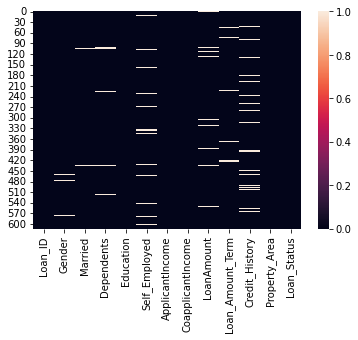

In [8]:
sns.heatmap(df.isna())

In [9]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])


In [10]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no null values present now

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


We can observe that there is skewness present in thee data as there is a noticable difference in the mean value and median(50%)

There might also be some outliers present in the dataset as there is a difference in the 75% value and max value.

In [12]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


Loan_ID is just unique numbers given, it will not help in builing the model. So, we will remove it.

In [13]:
df=df.drop(columns=['Loan_ID'])

In [14]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
c=[]
n=[]
for a in df.dtypes.index:
    if df.dtypes[a]=='object':
        c.append(a)
    else:
        n.append(a)
        
print(c)
print(n)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


# Data Visualisation

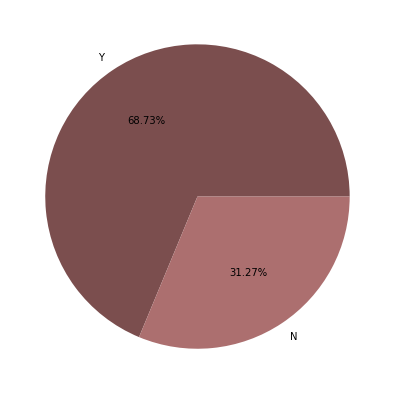

In [16]:
plt.figure(figsize=(7,7))
plt.pie(df['Loan_Status'].value_counts(), labels=df['Loan_Status'].value_counts().index, colors=sns.color_palette('pink'), autopct='%1.2f%%')
plt.show()

Male      502
Female    112
Name: Gender, dtype: int64


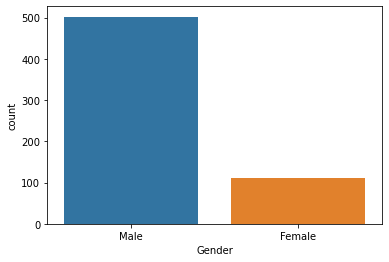

In [17]:
s=sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

<AxesSubplot:xlabel='Gender', ylabel='count'>

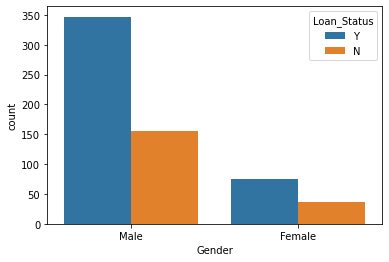

In [18]:
sns.countplot(x='Gender',data=df,hue='Loan_Status')

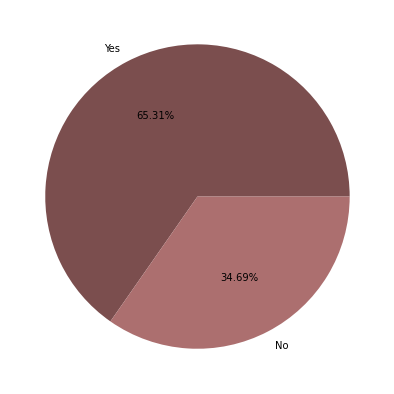

In [19]:
plt.figure(figsize=(7,7))
plt.pie(df['Married'].value_counts(), labels=df['Married'].value_counts().index, colors=sns.color_palette('pink'), autopct='%1.2f%%')
plt.show()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


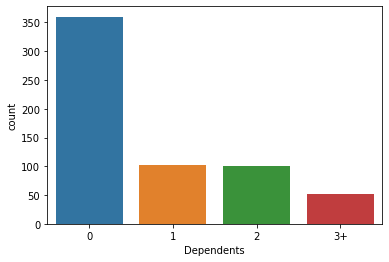

In [20]:
s=sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())


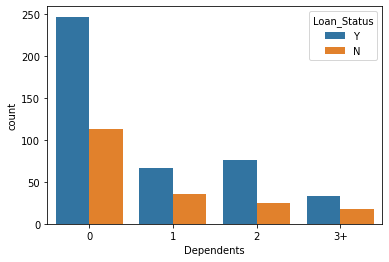

In [21]:
 chart = sns.countplot(x='Dependents',data=df,hue='Loan_Status')

No     532
Yes     82
Name: Self_Employed, dtype: int64


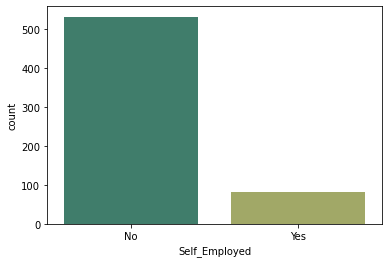

In [22]:
s=sns.countplot(x='Self_Employed',data=df,palette="gist_earth")
print(df['Self_Employed'].value_counts())

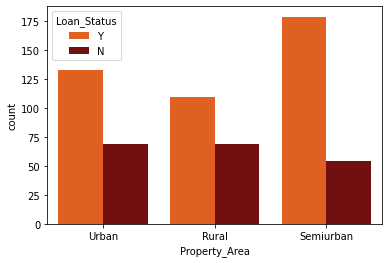

In [23]:
 chart = sns.countplot(x='Property_Area',data=df,hue='Loan_Status',palette='gist_heat_r')

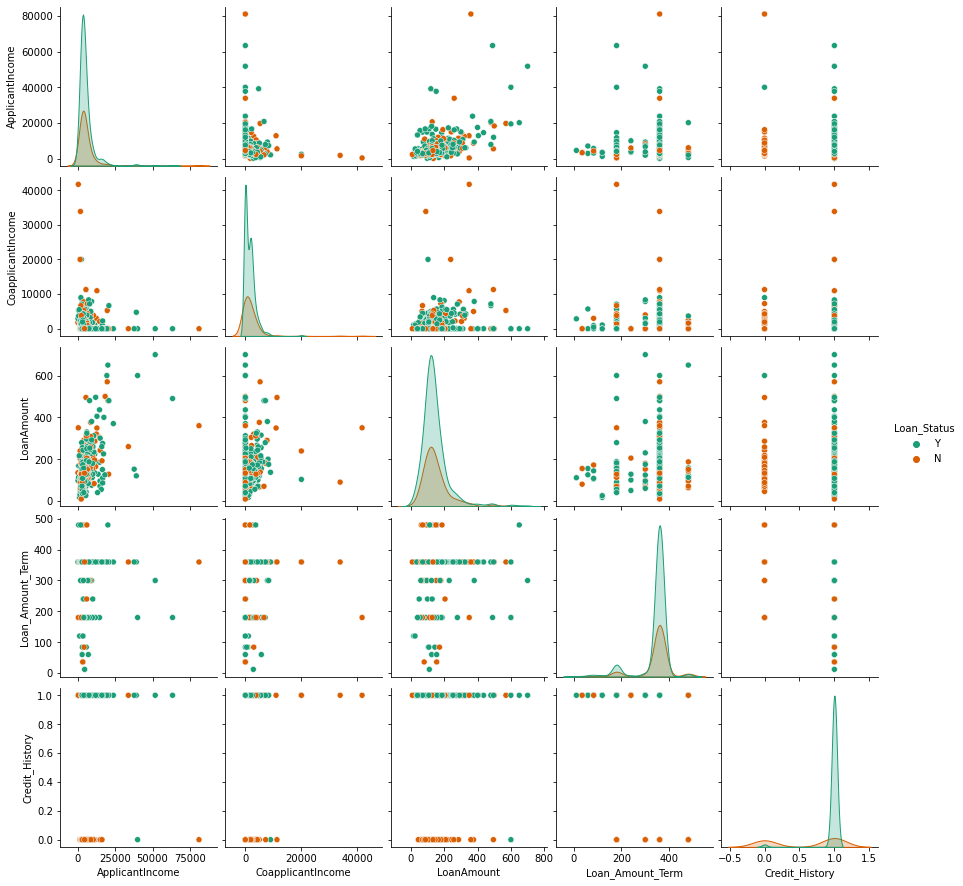

In [24]:
sns.pairplot(df,hue='Loan_Status',palette='Dark2')

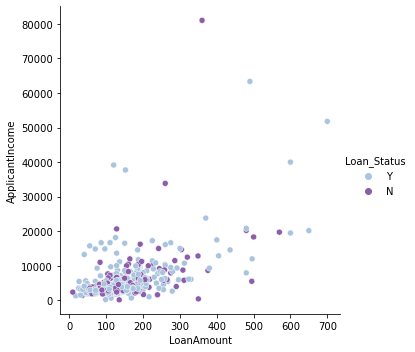

In [25]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status',palette='BuPu')
plt.show()

# Encoding

In [26]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [27]:
df.replace({'Married':{'Yes':1,'No':0}},inplace=True)

In [28]:
df.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
df.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)
df.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(6), object(2)
memory usage: 57.7+ KB


In [30]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
oe=OrdinalEncoder()
le=LabelEncoder()
df['Loan_Status']= le.fit_transform(df['Loan_Status'])

In [31]:
df['Dependents']=oe.fit_transform(df['Dependents'].values.reshape(-1,1))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(5), int32(1), int64(6)
memory usage: 55.3 KB


In [33]:
df['Dependents'].value_counts()

0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

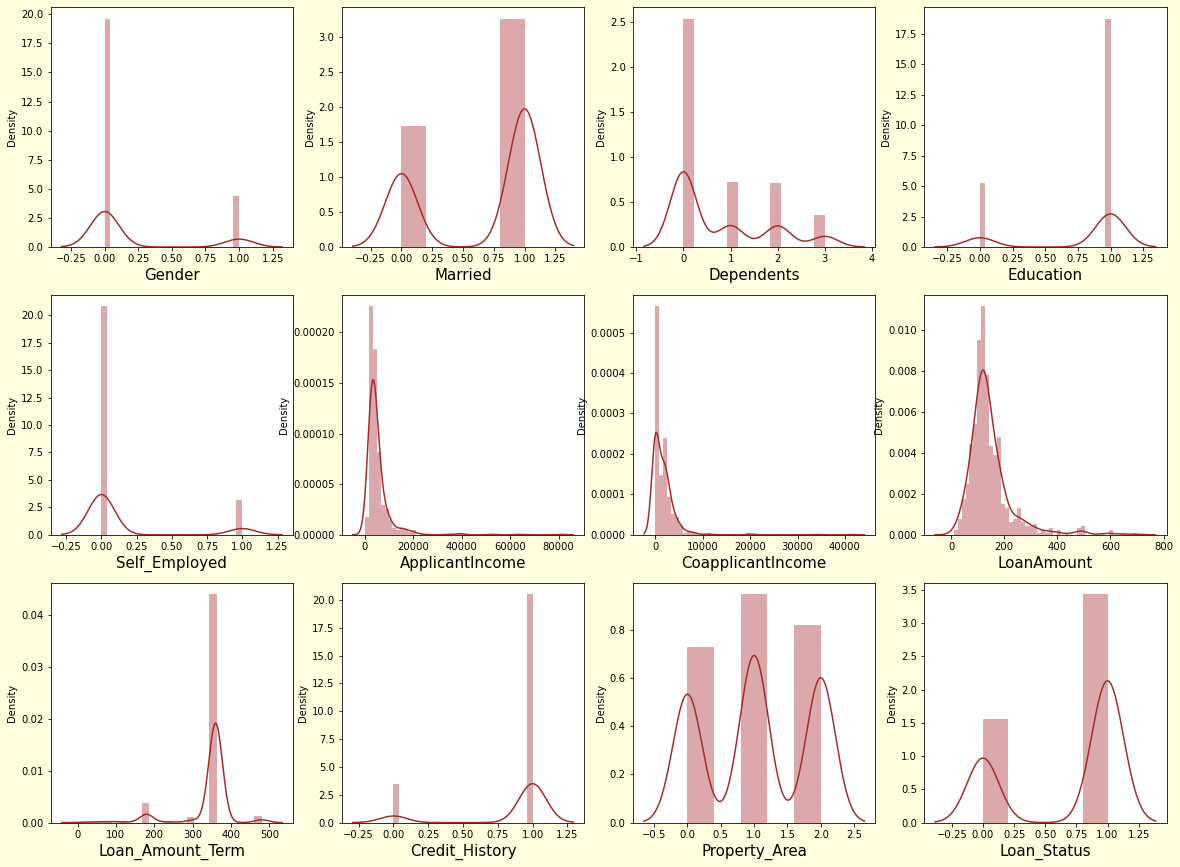

In [34]:
plt.figure(figsize=(20,15),facecolor='lightyellow')
pltno=1

for c in df:
    if pltno<=12:
        ax=plt.subplot(3,4,pltno)
        sns.distplot(df[c],color='brown')
        plt.xlabel(c,fontsize=15)
        
    pltno+=1

In [35]:
df.skew()

Gender               1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

There is skewness present in the dataset


<AxesSubplot:>

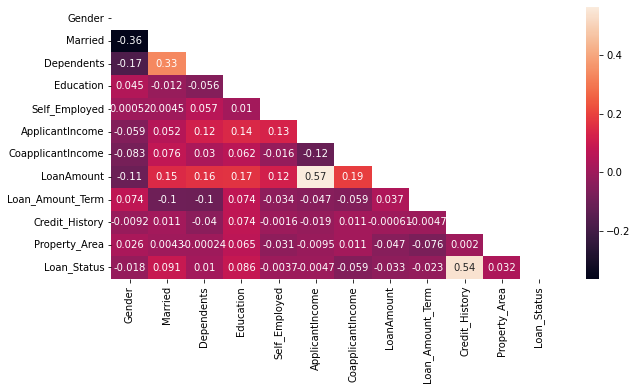

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,mask=np.triu(df.corr()))

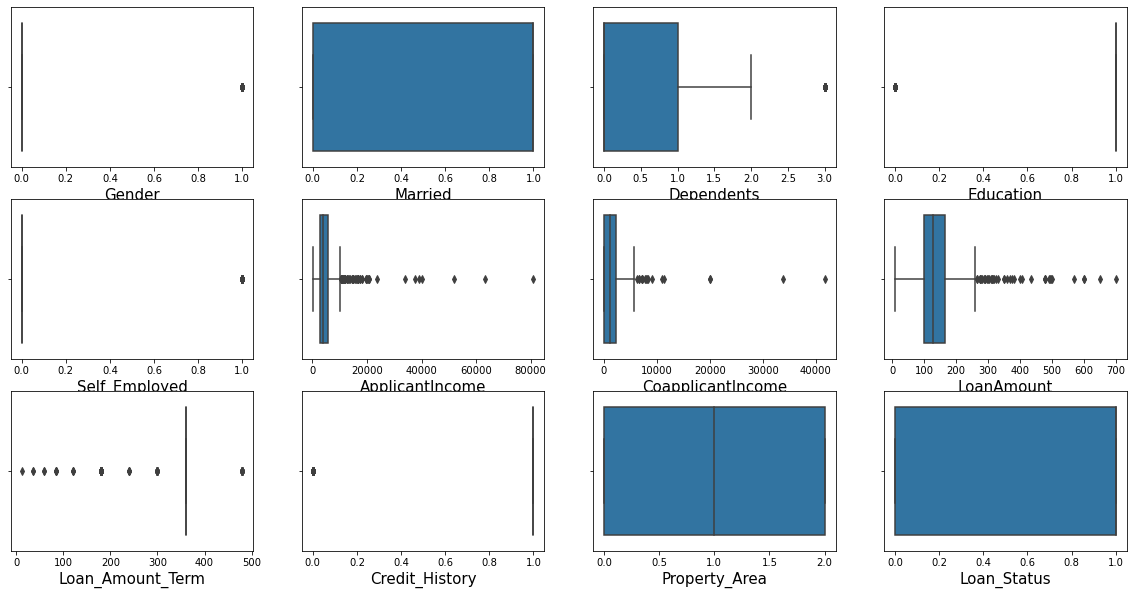

In [37]:
plt.figure(figsize=(20,10))
pn=1
for c in df:
    if pn<=12:
        ax=plt.subplot(3,4,pn)
        sns.boxplot(df[c])
        plt.xlabel(c,fontsize=15)
    pn+=1

There are outliers present in the dataset

In [38]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))

z.shape

(614, 12)

In [39]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [40]:
 df1=df[(z<3).all(axis=1)]
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,0,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,0,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,0,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,0,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [41]:
df1.shape

(577, 12)

In [42]:
df.shape

(614, 12)

In [43]:
# data loss

(614-577)/614*100

6.026058631921824

In [44]:
# 6.02% of data loss is acceptable. 
# Now we will seperate the features and label

In [45]:
x=df1.drop(columns=['Loan_Status'])
y=df1['Loan_Status']

In [46]:
x.skew()

Gender               1.622920
Married             -0.630211
Dependents           1.052106
Education           -1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

In [47]:
s=['Gender','Dependents','ApplicantIncome','LoanAmount','Loan_Amount_Term']

In [48]:
from sklearn.preprocessing import PowerTransformer
yj = PowerTransformer(method = 'yeo-johnson')

In [49]:
x[s] = yj.fit_transform(x[s].values)

In [50]:
x.skew()

Gender               1.622920
Married             -0.630211
Dependents           0.478360
Education           -1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome    1.350517
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

In [51]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

# Standardising the data

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[-0.47713685, -1.36251079, -0.80924269, ...,  0.13078824,
         0.41851254,  1.22747207],
       [-0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254, -1.30652215],
       [-0.47713685,  0.73393914, -0.80924269, ...,  0.13078824,
         0.41851254,  1.22747207],
       ...,
       [-0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254,  1.22747207],
       [-0.47713685,  0.73393914,  1.34467098, ...,  0.13078824,
         0.41851254,  1.22747207],
       [ 2.09583477, -1.36251079, -0.80924269, ...,  0.13078824,
        -2.38941464, -0.03952504]])

In [53]:
xx=pd.DataFrame(scaled_x,columns=x.columns)

In [54]:
xx

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.477137,-1.362511,-0.809243,0.541961,-0.380580,0.681780,-0.861036,0.000771,0.130788,0.418513,1.227472
1,-0.477137,0.733939,0.902869,0.541961,-0.380580,0.234783,0.052840,0.000771,0.130788,0.418513,-1.306522
2,-0.477137,0.733939,-0.809243,0.541961,2.627567,-0.527201,-0.861036,-1.437336,0.130788,0.418513,1.227472
3,-0.477137,0.733939,-0.809243,-1.845150,-0.380580,-0.791972,0.567956,-0.153545,0.130788,0.418513,1.227472
4,-0.477137,-1.362511,-0.809243,0.541961,-0.380580,0.728848,-0.861036,0.238260,0.130788,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,2.095835,-1.362511,-0.809243,0.541961,-0.380580,-0.587375,-0.861036,-1.293791,0.130788,0.418513,-1.306522
573,-0.477137,0.733939,1.533596,0.541961,-0.380580,0.035386,-0.861036,-2.332692,-2.562700,0.418513,-1.306522
574,-0.477137,0.733939,0.902869,0.541961,-0.380580,1.281658,-0.715592,1.845015,0.130788,0.418513,1.227472
575,-0.477137,0.733939,1.344671,0.541961,-0.380580,1.164426,-0.861036,0.976055,0.130788,0.418513,1.227472


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(xx.values,i)
                    for i in range(len(xx.columns))]
vif["features"]=xx.columns
vif

,Vif values,features
0,1.209076,Gender
1,1.370793,Married
2,1.190230,Dependents
3,1.072379,Education
4,1.055429,Self_Employed
5,1.658059,ApplicantIncome
6,1.474024,CoapplicantIncome
7,1.664035,LoanAmount
8,1.062601,Loan_Amount_Term
9,1.008445,Credit_History


All vif values are under 10


In [56]:
xx

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.477137,-1.362511,-0.809243,0.541961,-0.380580,0.681780,-0.861036,0.000771,0.130788,0.418513,1.227472
1,-0.477137,0.733939,0.902869,0.541961,-0.380580,0.234783,0.052840,0.000771,0.130788,0.418513,-1.306522
2,-0.477137,0.733939,-0.809243,0.541961,2.627567,-0.527201,-0.861036,-1.437336,0.130788,0.418513,1.227472
3,-0.477137,0.733939,-0.809243,-1.845150,-0.380580,-0.791972,0.567956,-0.153545,0.130788,0.418513,1.227472
4,-0.477137,-1.362511,-0.809243,0.541961,-0.380580,0.728848,-0.861036,0.238260,0.130788,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,2.095835,-1.362511,-0.809243,0.541961,-0.380580,-0.587375,-0.861036,-1.293791,0.130788,0.418513,-1.306522
573,-0.477137,0.733939,1.533596,0.541961,-0.380580,0.035386,-0.861036,-2.332692,-2.562700,0.418513,-1.306522
574,-0.477137,0.733939,0.902869,0.541961,-0.380580,1.281658,-0.715592,1.845015,0.130788,0.418513,1.227472
575,-0.477137,0.733939,1.344671,0.541961,-0.380580,1.164426,-0.861036,0.976055,0.130788,0.418513,1.227472


In [57]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

Our target variable is imbalanced, so we will balance it first

In [58]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
xx, y = oversample.fit_resample(xx, y)
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

# Model Building

In [59]:
#importing necessary libraries for model building

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [61]:
maxAccu=0
maxRS=0
lg=LogisticRegression()
for i in range(10,50):
    x_train,x_test,y_train,y_test=train_test_split(xx,y,random_state=i,test_size=.25)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy score is', maxAccu , 'on random state', maxRS)

Best Accuracy score is 0.7587939698492462 on random state 43


In [62]:
# the model gives best accuracy at random state 43

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(xx,y,random_state=43,test_size=.25)


In [64]:
models=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]


In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
for m in models:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    predm=m.predict(xtest)
    print('\033[1m','For' ,m,'\033[0m','Accuracy score is: ',accuracy_score(ytest,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(ytest,predm))
    print ('\n','Classification Report:','\n',classification_report(ytest,predm))
    cvs=cross_val_score(m,xx,y)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*'*100)

 For LogisticRegression()  Accuracy score is:  0.7587939698492462

 Confusion matrix: 
 [[53 45]
 [ 3 98]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.54      0.69        98
           1       0.69      0.97      0.80       101

    accuracy                           0.76       199
   macro avg       0.82      0.76      0.75       199
weighted avg       0.81      0.76      0.75       199

Cross Validation Score= 0.7060455974842766 

****************************************************************************************************
 For RandomForestClassifier()  Accuracy score is:  0.8291457286432161

 Confusion matrix: 
 [[77 21]
 [13 88]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82        98
           1       0.81      0.87      0.84       101

    accuracy                           0.83       199
   macro avg       0.83      0.83    

Randomforest Classifier is our best model

# Hyperparameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
rc=RandomForestClassifier()
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[5,10,15,20,25],
      'criterion':['gini','entropy']}

gcs=GridSearchCV(rc,param,cv=5,scoring='accuracy')
gcs.fit(xtrain,ytrain)
gcs.best_params_


{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2'}

In [89]:
fmodel=RandomForestClassifier(max_depth=15,criterion='gini',max_features='sqrt')

In [90]:
fmodel.fit(xtrain,ytrain)


RandomForestClassifier(max_depth=15, max_features='sqrt')

In [91]:
pred=fmodel.predict(xtest)
acc=accuracy_score(ytest,pred)
print(acc*100)

82.91457286432161


# Saving  he model

In [92]:
import joblib
joblib.dump(fmodel,'loan_application_status_prediction')

['loan_application_status_prediction']

# Loading the model

In [93]:
m = joblib.load("loan_application_status_prediction")
p=m.predict(xtest)

In [94]:
d=pd.DataFrame({'predicted values':p,'actual values':ytest})

In [95]:
d

,predicted values,actual values
525,1,1
480,1,1
348,1,0
370,0,1
479,0,0
...,...,...
451,0,1
291,1,1
103,1,0
400,1,1


# AUC ROC curve

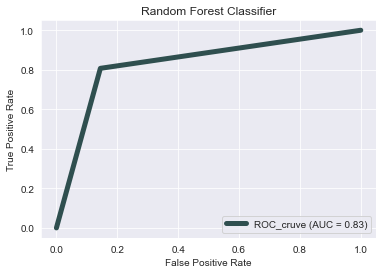

In [98]:
from sklearn import metrics
sns.set_style('darkgrid')
fpr, tpr, thresholds = metrics.roc_curve(p, ytest)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC_cruve')
display.plot(lw=5,color='darkslategrey')
plt.title('Random Forest Classifier')
plt.show()

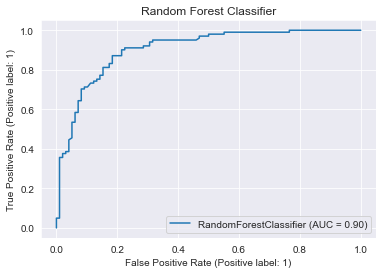

In [99]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(fmodel,xtest,ytest)
plt.title('Random Forest Classifier')
plt.show()


# Confusion Matrix

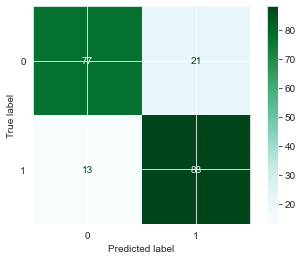

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytest, p)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='BuGn')